# Transfer Learning use case

On this notebook we will cover the fine tuning of a simple model on a custom dataset, taking a previously trained model. We will cover the next topics:
- dogs/cats/horses dataset
- Model architecture: 
    - VGG16
    - Dense layers
- Image generator from a directory
- Test on random images
### The dataset

The dataset is composed of 197 images of dogs, cats and horses. It is structured to be in label-related folders:

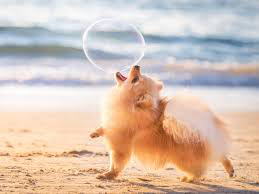

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session()  # For easy reset of notebook state.

from tensorflow.keras.preprocessing import image
image.load_img('/home/fer/data/formaciones/master/datasets/cats_dogs_horses/dogs/images (8).jpg')

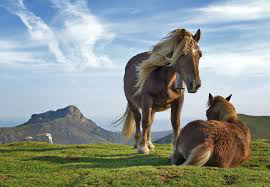

In [4]:
image.load_img('/home/fer/data/formaciones/master/datasets/cats_dogs_horses/horses/images (11).jpg')

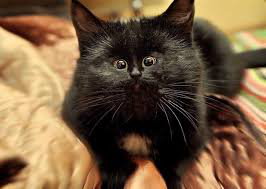

In [5]:
image.load_img('/home/fer/data/formaciones/master/datasets/cats_dogs_horses/cats/images (15).jpg')

Please note the unbalance on the classes, which could be an issue if we were to train more seriously...

## Model Architecture
Build the model to use a pretrained vgg16 network without the last layer, pretrained on imagenet. Then:
- Add a global average pooling layer after the pre-trained structure
- Add a dense layer, with 512 units and relu activated
- The final layer will be another fully connected with the number of classes and softmax activated.


<font color=red> Hint: use the imported libraries</font>

In [ ]:
import pandas as pd
import numpy as np
import keras

from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, VGG16


base_model=base_model=VGG16(weights='imagenet',include_top=False) 

x=base_model.output
x=...
preds=...

<font color=red> Create the model and print the summary. What happens with the weights?</font>

In [ ]:
from keras.models import Model

...

In [5]:
len (model.layers)

24

<font color=red> Set the first 19 layers to non_trainable, and the rest to trainable. </font>

In [ ]:
for layer in model.layers[:19]:
    ...
for layer in model.layers[19:]:
    ...

<font color=red> Create the generator and specify it will use the vgg preprocessing input function. No other data augmentation so far. Add the flow_from directory function to include where the data will be taken from. <br>Use target size of 224 square. </font>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16

train_datagen=...

# default parameters
color_mode='rgb'
batch_size=8
class_mode='categorical'
shuffle=True

train_generator=...


<font color=red> Compile the model, using adam and categorical Xentropy. Include accuracy as a metric. <br> Train the model for 5 epochs. Remember to include the right step_size. Hint: use the generator .n and .batch_size properties </font>

In [ ]:
from tensorflow.keras.optimizers import Adam
...

<font color=red> Build a function to test the model on random images from internet. Predict the ones from the given directory <br> Hints: <br> - USe the previously loaded functions
<br> - Repeat the processing we did before. No, you are not repeating it. See why? </font>

In [ ]:
from numpy import expand_dims
import matplotlib.pyplot as plt

class_dict = {v:k for k, v in train_generator.class_indices.items()}

def predict_image(path):
    img = ...
    data = ...
    pred = ...
    
    print(pred)
    return img
predict_image('/home/fer/data/master/datasets/chorra_tests/gato.jpg')